# Image Captioning using Neural Networks

### Group1: Arpit Arora, Lijo Thomas, Prashant Singh, Tanveer Rainu 

##### Final Project-IDS 576
##### Masters in Science of Business Analytics 
##### University of Illinois at Chicago 


#### Abstract
Automatically generating textual description from an artificial system given any image is the task of image captioning. Image captioning requires to recognize the important objects, their attributes and their relationships in an image. It also needs to generate syntactically and semantically correct sentences. Deep learning-based techniques are capable of handling the complexities and challenges of image captioning. In this project, we aim to present a comprehensive review of one of the best-performing existing deep learning-based image captioning technique using an encoder decoder architecture using CNNs and LSTMs. We discuss the foundation of this technique to analyze its performances, strengths and limitations. We also discuss in detail the preprocessing, modeling and the evaluation pipeline used in this deep learning based automatic image captioning solution.

#### Introduction

Automatically describing the content of an image is a fundamental problem in artificial intelligence that connects computer vision and natural language processing. Image captioning is important for many reasons. For example, they can be used for automatic image indexing. Image indexing is important for Content-Based Image Retrieval (CBIR) and therefore, it can be applied to many areas, including biomedicine, commerce, the military, education, digital libraries, and web searching. Social media platforms such as Facebook and Twitter can directly
generate descriptions from images. The descriptions can include where we are (e.g., beach, cafe), what we wear and importantly what we are doing there. Image captioning is a popular research area of Artificial Intelligence (AI) that deals with image
understanding and a language description for that image. Image understanding needs to detect and
recognize objects. It also needs to understand scene type or location, object properties and their interactions. Generating well-formed sentences requires both syntactic and semantic understanding
of the language The solution offered in this project uses an encoder-decoder architecture- so basically, the task of image captioning is divided into two modules logically – one is an image based model – which extracts the features and nuances out of our image creating a feature vector capturing high level features in the image, and the other is a language based model (using RNN in conjunction with LSTM)– which translates the features and objects given by our image based model to a natural sentence.
Understanding an image largely depends on obtaining image features. The techniques used for
this purpose can be broadly divided into two categories: (1) Traditional machine learning based
techniques and (2) Deep machine learning based techniques. In traditional machine learning, hand crafted features such as Local Binary Patterns (LBP), Scale-Invariant Feature Transform (SIFT), the Histogram of Oriented Gradients (HOG), and a combination of such features are widely used. In these techniques, features are extracted from input data. They are then passed to a classifier such as Support Vector Machines (SVM) in order to classify an object. Since hand crafted features are task specific, extracting features from a large and diverse set of data is not feasible. Moreover, real world data such as images and video are complex and have different semantic interpretations.
On the other hand, in deep machine learning based techniques, features are learned automatically from training data and they can handle a large and diverse set of images and videos. For example, Convolutional Neural Networks (CNN) are widely used for feature learning, and a classifier such as Softmax is used for classification. CNN is generally followed by Recurrent Neural Networks (RNN) in order to generate captions.
Deep neural network techniques using the convolutional neural network algorithms have successfully solved image classification problems with astounding accuracy. Convolutional neural networks (CNN) is a special architecture of artificial neural networks, proposed by Yann LeCun in 1988. On 30 September 2012, a convolutional neural network (CNN) called AlexNet achieved a top-5 error of 15.3% in the ImageNet 2012 Challenge, more than 10.8 percentage points lower than that of the runner up. This was made feasible due to the utilization of Graphics processing units (GPUs) during training, an essential ingredient of the deep learning revolution. In 2017, 29 of 38 competing teams in the imageNet challenge had greater than 95% accuracy.All of these pretrained networks are freely available on github and can be used for image related tasks incorporating CNNs using transfer learning. Transfer learning allows us to train deep networks using significantly less data then we would need if we had to train from scratch. With transfer learning, we are in effect transferring the “knowledge” that a model has learned from a previous task, to our current one. The idea is that the two tasks are not totally disjoint, and as such we can leverage whatever network parameters that model has learned through its extensive training, without having to do that training ourselves. Although we are not using CNNs for image recognition here, we can use the pretrained CNN architecture as a feature extractor which captures all the high-level features of the image. The penultimate layer giving us a feature vector capturing high level features of the image and we get rid of the last SoftMax layer to classify the images and instead feed the resultant feature vector to a language model. The decoder part takes care of converting the encoded vector capturing high level features into text using RNNs in with LSTMs. Text Generation is a type of Language Modelling problem. Language Modelling is the core problem for a number of natural language processing tasks such as speech to text, conversational system, and text summarization. A trained language model learns the likelihood of occurrence of a word based on the previous sequence of words used in the text. Unlike Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent Neural Networks. This creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state allows the neurons an ability to remember what have been learned so far. The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for the network to learn and tune the parameters of the earlier layers. To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed. LSTMs have an additional state called ‘cell state’ through which the network makes adjustments in the information flow. The advantage of this state is that the model can remember or forget the leanings more selectively. The details of LSTM are beyond the scope of this report, but the LSTM architecture brings with itself a special advantage that it can also incorporate “memory” in the algorithm. The architecture used for the image captioning problem looks something like this:


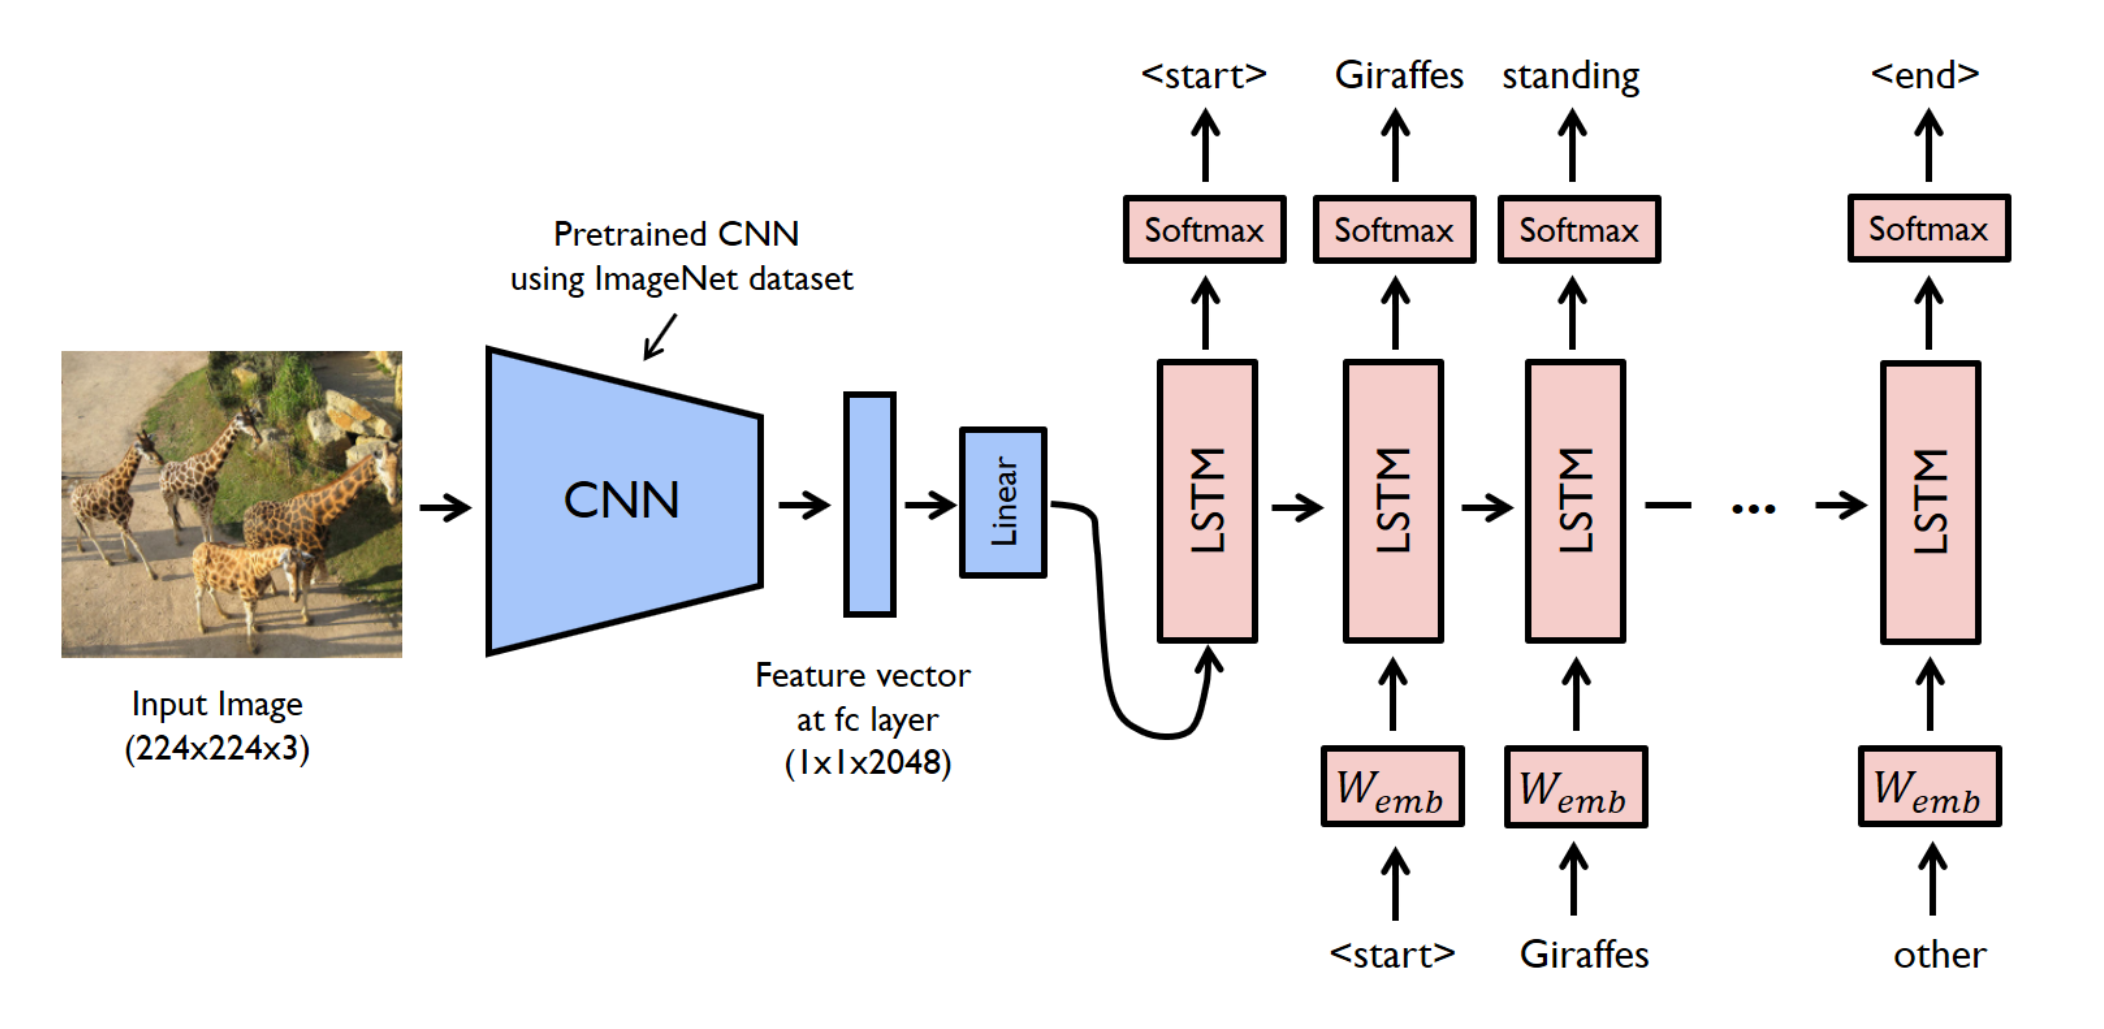

In [4]:
from IPython.display import Image
Image (filename="arch.png")

# Code

### Code walk-through-video:

https://youtu.be/AqM7t-AEFNM

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import argparse
import pickle 
import os
from torchvision import transforms 
from build_vocab import Vocabulary
from PIL import Image
### libraries required for creating the models
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence
### libraries for creating the vocabulary
import nltk
import pickle
import argparse
from collections import Counter
from pycocotools.coco import COCO
### libraries for resizing the image
from PIL import Image
### Libraries for training the model 
import numpy as np
import os
import pickle
from data_loader import get_loader
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms
from model import *
from build_vocab import Vocabulary

The code is referenced from https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials/03-advanced/image_captioning
Following steps were performed to setup data.
1. Download coco datasets for training and testing
2. Download captions and store them at /home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data
3. Download coco/PythonAPI/ to map the data to captions. 
4. Python script to dataloader which will return (images, captions, lengths) for each iteration.

In [4]:
#### Specifing the parameters required for the image resizing. We are resizing all the images to 256 * 256 pixels. 
#### Input and output directories specified respectively.
size = 256
image_dir = "/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/train2014/"
output_dir = "/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/"

def resize_image(image, size):
    """Resize an image to the given size."""
    return image.resize(size, Image.ANTIALIAS)

def resize_images(image_dir, output_dir, size):
    """Resize the images in 'image_dir' and save into 'output_dir'."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    images = os.listdir(image_dir)
    num_images = len(images)
    for i, image in enumerate(images):
        with open(os.path.join(image_dir, image), 'r+b') as f:
            with Image.open(f) as img:
                img = resize_image(img, size)
                img.save(os.path.join(output_dir, image), img.format)
        if (i+1) % 100 == 0:
            print ("[{}/{}] Resized the images and saved into '{}'."
                   .format(i+1, num_images, output_dir))

def main(image_dir,output_dir,image_size):
    image_size = [image_size, image_size]
    resize_images(image_dir, output_dir, image_size)
    
main(image_dir,output_dir,size)

[100/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[200/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[800/82783] Resized the images and saved into '/home/te

[6200/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[6900/82783] Resized the images and saved into '

[12300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[12900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[13000/82783] Resized the images and save

[18300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[18900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[19000/82783] Resized the images and save

[24300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[24900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[25000/82783] Resized the images and save

[30300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[30900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[31000/82783] Resized the images and save

[36300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[36900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[37000/82783] Resized the images and save

[42300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[42900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[43000/82783] Resized the images and save

[48300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[48900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[49000/82783] Resized the images and save

[54300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[54900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[55000/82783] Resized the images and save

[60300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[60900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[61000/82783] Resized the images and save

[66300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[66900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[67000/82783] Resized the images and save

[72300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[72900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[73000/82783] Resized the images and save

[78300/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78400/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78500/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78600/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78700/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78800/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[78900/82783] Resized the images and saved into '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014/'.
[79000/82783] Resized the images and save

In [7]:
#### Create vocabulary wrapper class
class Vocabulary(object):
    #### creating two dictionaries for representation of one-hot vector equivalent representation of the sentence/vocabulary.
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
   #### adding each word in the vocabulary to the dictonaries word2idx and idx2word. 
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
  ####   default <unk> if a given word is not present in the vocabulary. 
    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]
 ####   Getting the length of sentence.
    def __len__(self):
        return len(self.word2idx)

#### Building the vocabulary 
def build_vocab(json, threshold):
    """Build a simple vocabulary wrapper."""
    coco = COCO(json)
    counter = Counter()
    ids = coco.anns.keys()
    for i, id in enumerate(ids):
        caption = str(coco.anns[id]['caption'])
        tokens = nltk.tokenize.word_tokenize(caption.lower())
        counter.update(tokens)

        if (i+1) % 1000 == 0:
            print("[{}/{}] Tokenized the captions.".format(i+1, len(ids)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    #### adding generic words required for predicting the sentence.
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Adding the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

def main():
    vocab = build_vocab(json="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/annotations/captions_train2014.json", threshold=4)
    vocab_path ="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/vocab.pkl" 
    with open(vocab_path, 'wb') as f:
        pickle.dump(vocab, f)
    print("Total vocabulary size: {}".format(len(vocab)))
    print("Saved the vocabulary wrapper to '{}'".format(vocab_path))

if __name__ == '__main__':
    main()

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[22000/414113] Tokenized the captions.
[23000/414113] Tokenized the captions.
[24000/414113] Tokenized the 

[210000/414113] Tokenized the captions.
[211000/414113] Tokenized the captions.
[212000/414113] Tokenized the captions.
[213000/414113] Tokenized the captions.
[214000/414113] Tokenized the captions.
[215000/414113] Tokenized the captions.
[216000/414113] Tokenized the captions.
[217000/414113] Tokenized the captions.
[218000/414113] Tokenized the captions.
[219000/414113] Tokenized the captions.
[220000/414113] Tokenized the captions.
[221000/414113] Tokenized the captions.
[222000/414113] Tokenized the captions.
[223000/414113] Tokenized the captions.
[224000/414113] Tokenized the captions.
[225000/414113] Tokenized the captions.
[226000/414113] Tokenized the captions.
[227000/414113] Tokenized the captions.
[228000/414113] Tokenized the captions.
[229000/414113] Tokenized the captions.
[230000/414113] Tokenized the captions.
[231000/414113] Tokenized the captions.
[232000/414113] Tokenized the captions.
[233000/414113] Tokenized the captions.
[234000/414113] Tokenized the captions.


In [7]:
#### Creating the model for image captioning
#### We have an encoder network which is named as EncoderCNN and a decoder network which is named as DecoderRNN. 
####        Encoder layout
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        ##### We are using a pretrained resnet152 CNN for the encoder part.
        resnet = models.resnet152(pretrained=True)
        """resnet152 is pretrained on imagenet dataset (ILSVRC-2012 ImageNet Large Scale Visual Recognition Challenge-2012) 
        imagenet dataset has 1.2 million images which are classified into 1000 categories. So, the final layer of the  
        pretrained resnet152 will have 1000 * 1 nodes. However for providing an input for the decoder network, we remove the 
        final layer of the CNN resnet152 and converting the final layer of the CNN to correspond to the input size of the 
        RNN decoder network"""
        modules = list(resnet.children())[:-1]      # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        #### We are speeding up the decoder algorithm by performing batch normalization. 
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        """Since the encoder model is pretrained using the imagenet data, we pass the MS coco data through the forward pass
        this will generate a feature representation of each image in forward pass, which is the input for the decoder network.
        We are specifying (no_grad()) dont collect stats for backpropogation"""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        """Since we have specified above the final layer to be equal to the vocabulary size, we are returning the representation 
        of the image in the same size as that of input size of decoder."""
        features = self.bn(self.linear(features))
        return features

    
#Decoder network is to be trained to generate image captions. We are using MS coco dataset to train the decoder.
#Decoder architecture
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        """Defining the layers for the decoder network
        1. The embedding layer: learnable parameters, which helps in the determining the similarity between the data
        characteristics. parameters we used for the embedding layer are (size of dictonary of embeddings,
        the size of embedding vector)
        2. RNN: We are using LSTM, which overcomes the vanishing gradient problem by having an extra recurrent state called a cell, 
        which can be thought of as the "memory" of the LSTM - and we use multiple gates which control the flow of information
        into and out of the memory. parameters for LSTM ( number of expected features in input, number of features in hidden state,
        number of layer in LSTM, batch_first=true (then the input and output tensors are provided as (batch, seq, feature)  
        3. Applying a linear transformation, with parameters (input size, outputsize) to get the predicted output. """
                           
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        #### Maximum length of the image caption. We have kept a default value of 20 if no value is provided at the input. 
        self.max_seg_length = max_seq_length  
        
    def forward(self, features, captions, lengths):
       #### Run the data through a forward pass and store the relavent data for backpropogation.      
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
       """To sample the image caption we are using greedy search, which pick the most likely first word given
        the image and then pick the second most likely output and so on. Usually we should use beam search algorithm 
        to generate better captions given the image."""
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

In [16]:
#### Training the model

#### Setting the device to GPU if available. 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def main():
    #### path for saving trained models
    model_path="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning"
    #### crop_size
    crop_size=224
    #### Vocabulary pickle path
    vocab_path="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/vocab.pkl"
    #### resized image path
    image_dir="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/resized2014"
    #### caption path
    caption_path="/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/annotations/captions_train2014.json"
    
    #### Model parameters
    embed_size=256
    hidden_size=512
    num_layers=1

    num_epochs=2
    batch_size=128
    num_workers=2
    learning_rate=0.001
    
    log_step=100
    save_step=1000

    #### Creating directory to save the model 
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    #### preprocessing the image: random cropping,randomhorizontalflippign and normalizing.
    #### The transformations are done so that the classifier gets various data samples. 
    #### Normalization is done to speed up the algorithm.
    transform = transforms.Compose([ 
        transforms.RandomCrop(crop_size),
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    
    #### Loading saved vocabulary class.
    #### This class contains functions like: add_word, build_vocabulary which were created in the build vocabulary step bove
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)
    
    #### Data loader for COCO dataset using data_loader.py script.
    #### This will return (images, captions, lengths) for each iteration.
    #### images: a tensor of shape (batch_size, 3, 224, 224).
    #### captions: a tensor of shape (batch_size, padded_length).
    #### lengths: a list indicating valid length for each caption. length is (batch_size)
    data_loader = get_loader(image_dir, caption_path, vocab, 
                             transform, batch_size,
                             shuffle=True, num_workers=num_workers) 

    #### Build the models
    #### Using the model we defined above
    encoder = EncoderCNN(embed_size).to(device)
    decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers).to(device)
    
    #### Setting the loss criterion and the optimizer.
    #### We use cross-entropy loss since there are multiple categories. 
    """ We are using adam(Adaptive mo) optimizer since Well suited for problems that are large in terms of data 
    and/or parameters and Hyper-parameters have intuitive interpretation and typically require little tuning."""
    criterion = nn.CrossEntropyLoss()
    params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
    optimizer = torch.optim.Adam(params, lr=learning_rate)
    
    # Train the models
    total_step = len(data_loader)
    for epoch in range(num_epochs):
        for i, (images, captions, lengths) in enumerate(data_loader):
            
            # Set mini-batch dataset
            images = images.to(device)
            captions = captions.to(device)
            targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
            
            # Forward, backward and optimize
            features = encoder(images)
            outputs = decoder(features, captions, lengths)
            loss = criterion(outputs, targets)
            decoder.zero_grad()
            encoder.zero_grad()
            loss.backward()
            optimizer.step()

            # Print log info
            if i % log_step == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                      .format(epoch, num_epochs, i, total_step, loss.item(), np.exp(loss.item()))) 
                
            # Save the model checkpoints
            if (i+1) % save_step == 0:
                torch.save(decoder.state_dict(), os.path.join(
                    model_path, 'decoder-{}-{}.ckpt'.format(epoch+1, i+1)))
                torch.save(encoder.state_dict(), os.path.join(
                    model_path, 'encoder-{}-{}.ckpt'.format(epoch+1, i+1)))

main()

loading annotations into memory...
Done (t=0.85s)
creating index...
index created!
Epoch [0/2], Step [0/3236], Loss: 9.2002, Perplexity: 9899.0812
Epoch [0/2], Step [100/3236], Loss: 3.7236, Perplexity: 41.4138
Epoch [0/2], Step [200/3236], Loss: 3.3792, Perplexity: 29.3468
Epoch [0/2], Step [300/3236], Loss: 3.1951, Perplexity: 24.4130
Epoch [0/2], Step [400/3236], Loss: 3.0801, Perplexity: 21.7599
Epoch [0/2], Step [500/3236], Loss: 2.9720, Perplexity: 19.5316
Epoch [0/2], Step [600/3236], Loss: 2.9429, Perplexity: 18.9700
Epoch [0/2], Step [700/3236], Loss: 2.6273, Perplexity: 13.8366
Epoch [0/2], Step [800/3236], Loss: 2.6708, Perplexity: 14.4515
Epoch [0/2], Step [900/3236], Loss: 2.7080, Perplexity: 14.9986
Epoch [0/2], Step [1000/3236], Loss: 2.6665, Perplexity: 14.3899
Epoch [0/2], Step [1100/3236], Loss: 2.5947, Perplexity: 13.3925
Epoch [0/2], Step [1200/3236], Loss: 2.5785, Perplexity: 13.1773
Epoch [0/2], Step [1300/3236], Loss: 2.4999, Perplexity: 12.1812
Epoch [0/2], Step

In [6]:
# Testing the model 
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Function to Load and Resize the image
def load_image(image_path, transform=None): 
    image = Image.open(image_path)
    image = image.resize([224, 224], Image.LANCZOS)
    if transform is not None:
        image = transform(image).unsqueeze(0)
    return image

In [7]:
# MODEL DIRS
ENCODER_PATH = '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/encoder-5-1000.ckpt'
DECODER_PATH = '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/decoder-5-1000.ckpt'
VOCAB_PATH   = '/home/team1/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/vocab.pkl'

# CONSTANTS
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1

In [8]:
#creating function to use the pretrained model for image captioning
#giving paths for the encoder, decoder and vocabulary models
def PretrainedResNet(image_path, encoder_path=ENCODER_PATH, 
                     decoder_path=DECODER_PATH,
                     vocab_path=VOCAB_PATH,
                     embed_size=EMBED_SIZE,
                     hidden_size=HIDDEN_SIZE,
                     num_layers=NUM_LAYERS):
    # Image preprocessing
    #normalizing the image based on mean and median, since normalization helps CNN perfomr better
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    
    # Load vocabulary wrapper
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)

# Building models
    encoder = EncoderCNN(embed_size).eval()  # eval mode (batchnorm uses moving mean/variance)
    decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
    encoder = encoder.to(device)
    decoder = decoder.to(device)
    
# Loading the trained model parameters
    encoder.load_state_dict(torch.load(encoder_path))
    decoder.load_state_dict(torch.load(decoder_path))
    
# Prepare an image
    image = load_image(image_path, transform)
    image_tensor = image.to(device)
    
# Generate a caption from the image
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy()  
    
# Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)[8:-5].title() 
    # Print out the image and the generated caption
    image = Image.open(image_path)
    return sentence, image

A Wooden Table Topped With A Wooden Bunk Bed . 


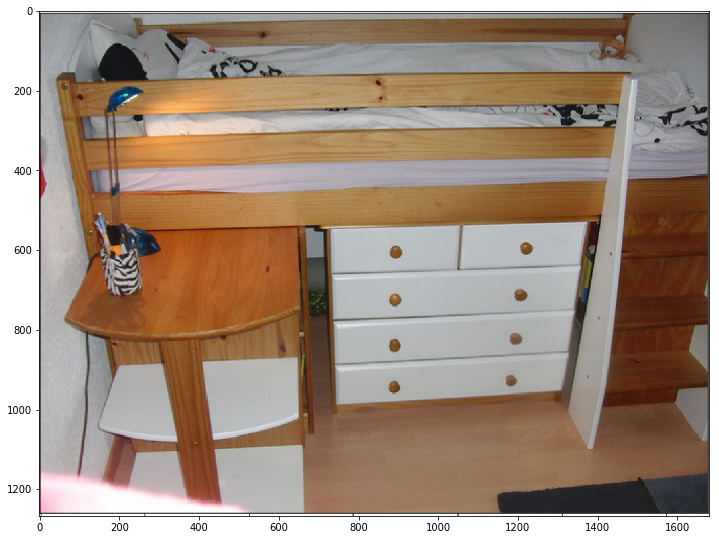

In [13]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/tablechair.JPG')
plt.imshow(image)
print(predicted_label)

A Group Of People Standing Around Each Other In A Room . 


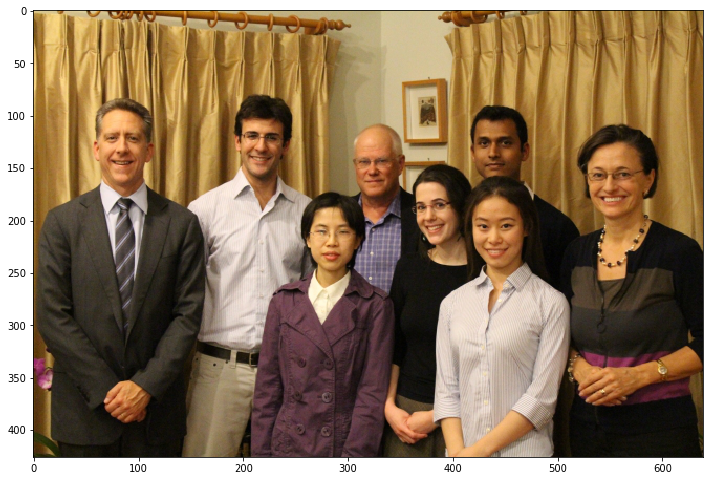

In [14]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path="/home/team1/Final_Project/test_images/Theja.jpeg")
plt.imshow(image)
print(predicted_label)


A Man Sitting At A Table With A Laptop . 


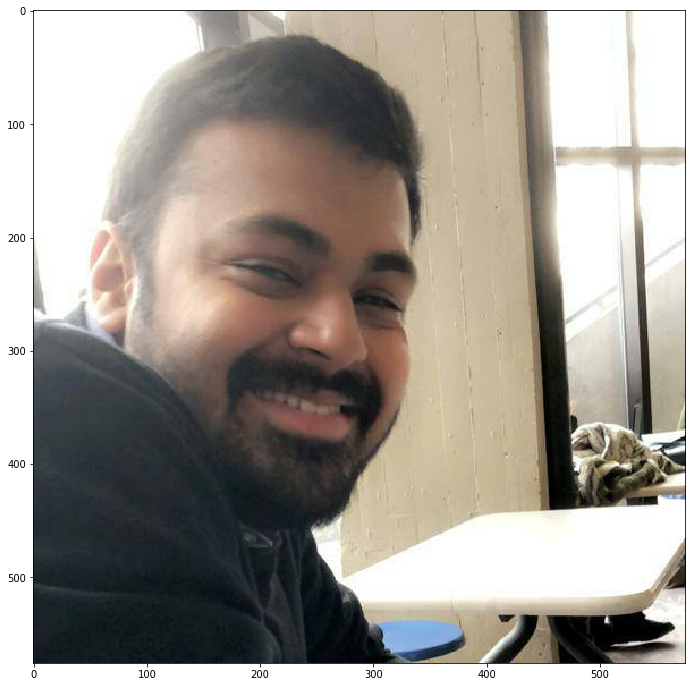

In [16]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path="/home/team1/Final_Project/test_images/lijo.jpg")
plt.imshow(image)
print(predicted_label)



A Woman Is Holding A Cell Phone In Her Hand . 


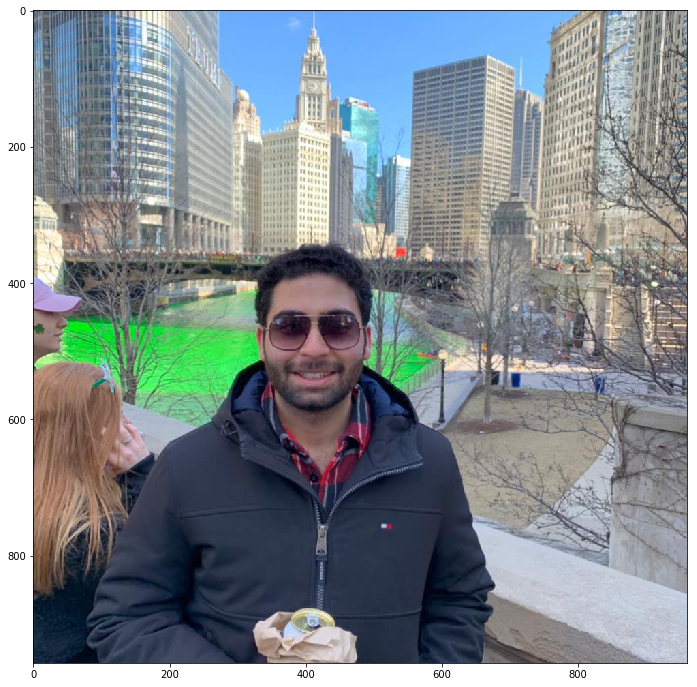

In [19]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/55786317_2478680805509947_1028704062494736384_n.jpg')
plt.imshow(image)
print(predicted_label)


A Man Is Standing On The Ground With His Arms Outstretched . 


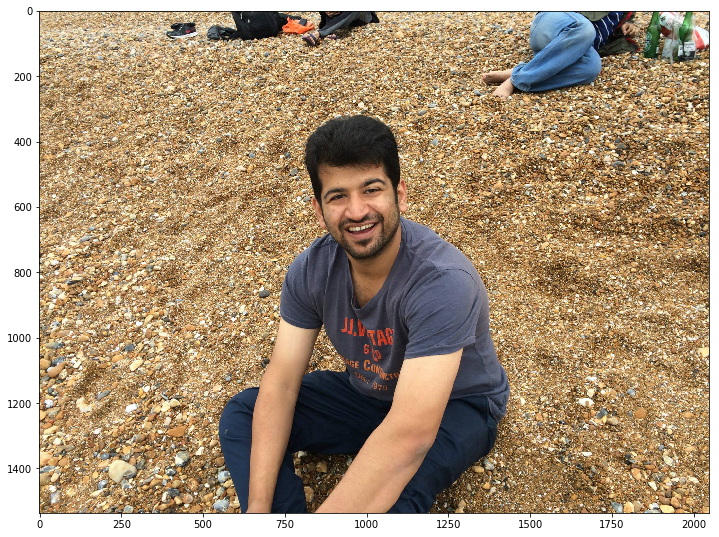

In [22]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/11922835_10153880373038352_7416489963176130152_o.jpg')
plt.imshow(image)
print(predicted_label)



A Man Is Standing Next To A Dog On A Leash . 


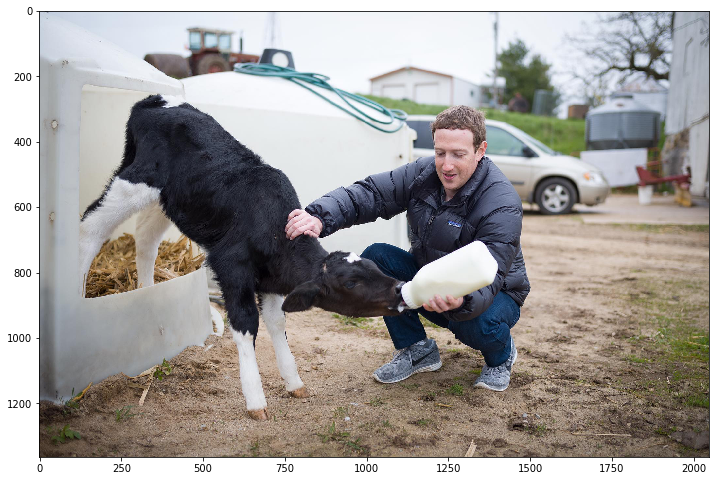

In [23]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/18209415_10103688678949611_3551863060939278427_o.jpg')
plt.imshow(image)
print(predicted_label)

A Red Double Decker Bus Driving Down A Street . 


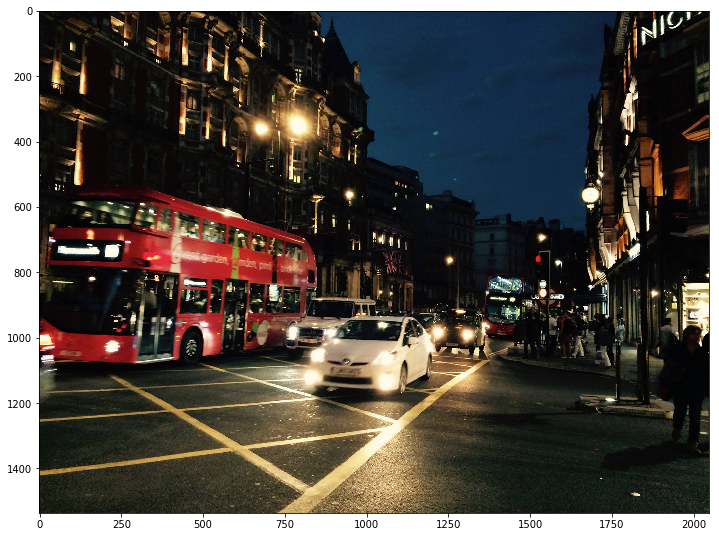

In [21]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/11885674_10153880202928352_4715482559184495056_o.jpg')
plt.imshow(image)
print(predicted_label)



A Group Of Men On A Field Playing With A Frisbee . 


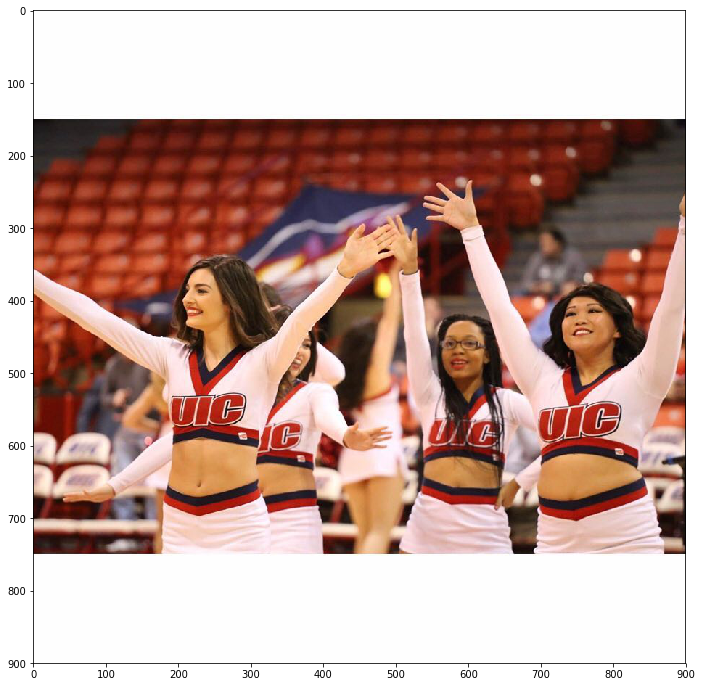

In [26]:
plt.figure(figsize=(12,12))
predicted_label, image = PretrainedResNet(image_path='/home/team1/Final_Project/test_images/51567911_290556788290670_7145148126614162151_n.jpg')
plt.imshow(image)
print(predicted_label)